**Hannah Soria**

Spring 2023

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind','seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [2]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, test_p)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.] 
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.] 
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean squared error.

The plot created by running the below cell should "look right" to you.

The mean squared error:  71.81095209669246


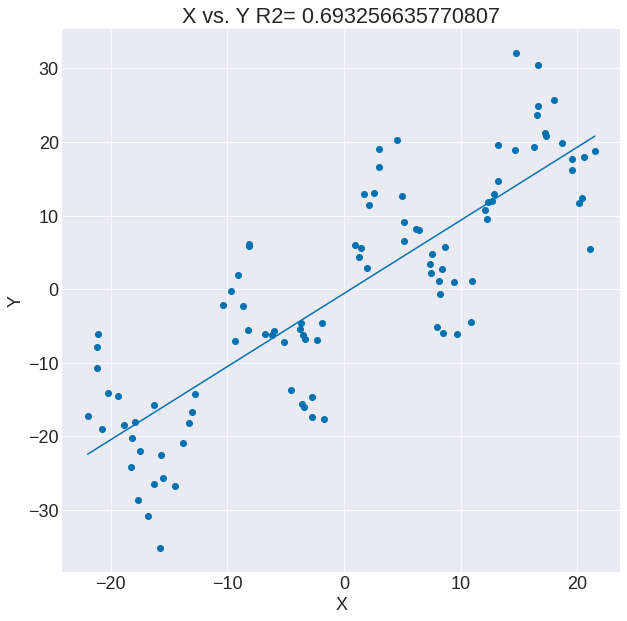

In [3]:
poly_data = data.Data("data/poly_data.csv")
poly_reg = linear_regression.LinearRegression(poly_data)
poly_reg.poly_regression("X","Y",1)
poly_reg.scatter("X","Y","X vs. Y")
print("The mean squared error: " , poly_reg.compute_mse())

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

The mean squared error:  55.030876980156634


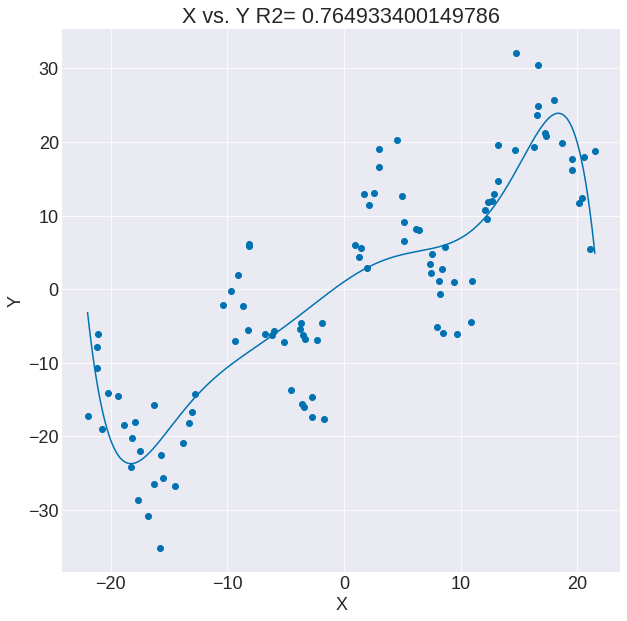

In [4]:
poly_data = data.Data("data/poly_data.csv")
poly_reg = linear_regression.LinearRegression(poly_data)
poly_reg.poly_regression("X","Y",7)
poly_reg.scatter("X","Y","X vs. Y")
print("The mean squared error: " , poly_reg.compute_mse())

**Question 4:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 5:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.

**Answer 4: This fit is better compared to p=1 because the R2 value is closer to 1 which represents the proportion of variance.**

**Answer 5: When the polynomial degree increases the MSE descreases and the R squared increases. This makes sense because the fit is a better fit the closer to 7 the degree gets. The means squared error measures how close the regression line is to the set of data points, the smaller the closer. The R squared represents the proportion of the variance on a 0 to 1 range therefore the closer to one the better the fit.**

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [5]:
fit_set = data.Data("data/poly_data.csv")
fit_set.limit_samples(0,49)
print(fit_set)
val_set = data.Data("data/poly_data.csv")
val_set.limit_samples(50,99)
print(val_set)

data/poly_data.csv(49x2)
Headers: 
X	Y	
------------------------------- 
Showing first 5/49rows 
2.147	11.382	
9.465	1.034	
4.52	20.251	
1.974	2.89	
-3.358	-6.809	

data/poly_data.csv(49x2)
Headers: 
X	Y	
------------------------------- 
Showing first 5/49rows 
-3.65	-4.658	
9.69	-6.107	
-21.986	-17.271	
-8.694	-2.22	
-15.536	-25.608	



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

The mean squared error:  50.70728233109187


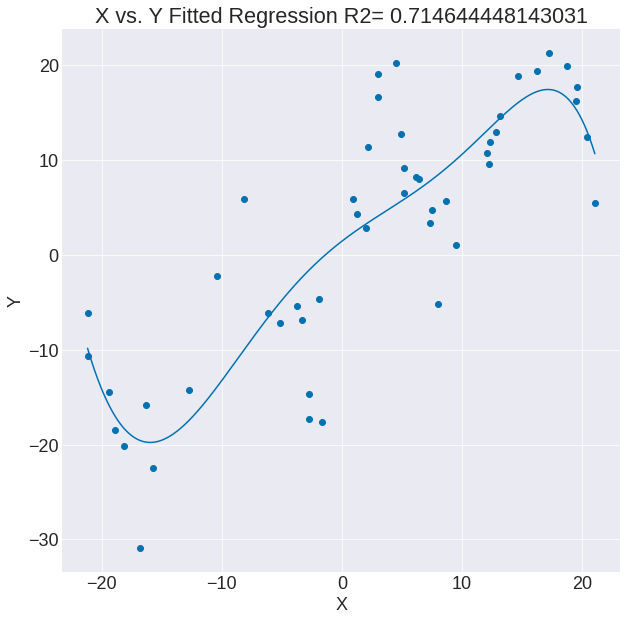

In [70]:
fit_reg = linear_regression.LinearRegression(fit_set)
fit_reg.poly_regression("X","Y",6)
fit_reg.scatter("X","Y", "X vs. Y Fitted Regression")
print("The mean squared error: " , fit_reg.compute_mse())

The mean squared error:  79.95998889820143


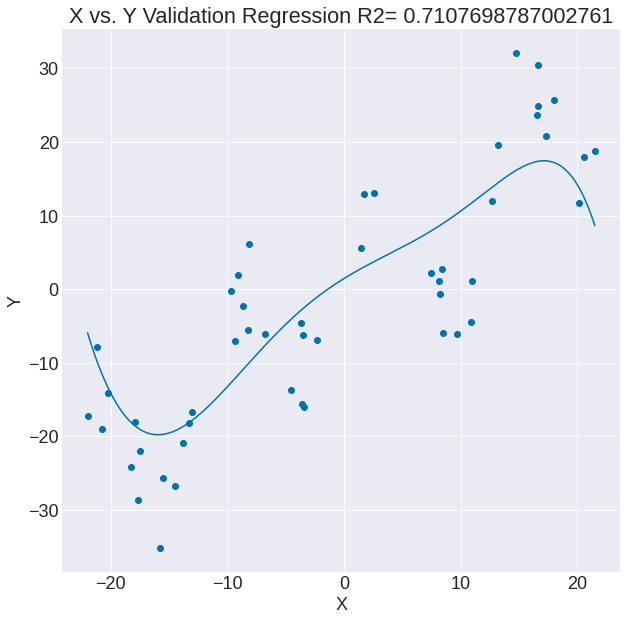

In [71]:
val_reg = linear_regression.LinearRegression(val_set)
val_reg.initialize(ind_vars = "X",dep_var = "Y",slope = fit_reg.get_fitted_slope(),intercept = fit_reg.get_fitted_intercept(),p =6)
val_reg.scatter(ind_var = "X", dep_var = "Y", title = "X vs. Y Validation Regression")
print("The mean squared error: " , val_reg.compute_mse())

**Question 6:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 7:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSE, $R^2$).

**Question 8:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 9:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSE, $R^2$).

**Answer 6: The fitted coefficients do a decent job of generalizing to the validation set. With a degree of 7 the fitted regression has a R2 of 0.78 and the validation regression has an R2 of 0.65. The plots compared to each other are similar but neither are close to a great fit of 1.0**

**Answer 7: The generalization get better as the increase then worsen again towards 7. In the middle of 1 to 7 the generalization is the most successful between the fitted and the validation. The MSE for 1 degree are 60.8 (fitted) and 87.4 (validation). The R2 for 1 degree are 0.65 (fitted) and 0.68 (validation). The MSE for 4 degrees are 53.5 (fitted) and 91.7 (validation). The R2 values for 4 degrees are 0.69 (fitted) and 0.66 (validation). The MSE for 7 degrees are 38.9 (fitted) and 97.3 (validation). The R2 values for 7 degrees are 0.78 (fitted) and 0.65 (validation).**

**Answer 8: I think the degree 6 is aceptable to the validation set because the MSEs are 50.7 and 79.9. The R2 values are 0.71 and 0.71. Since the R2 values are very similar I think that the fitted set generalizes the validation set well.**

**Answer 9: As you increase the degrees the fitted set generalizes the data better. At 9 degrees the MSEs are 23.5, 38.3and the R2s are 0.86,0.86. When you increase the degrees all the way to 13 the MSE becomes massive and the R2 becomes very small. This is overfitting**

The mean squared error:  15.222372092012364
The mean squared error:  77.11164685051408


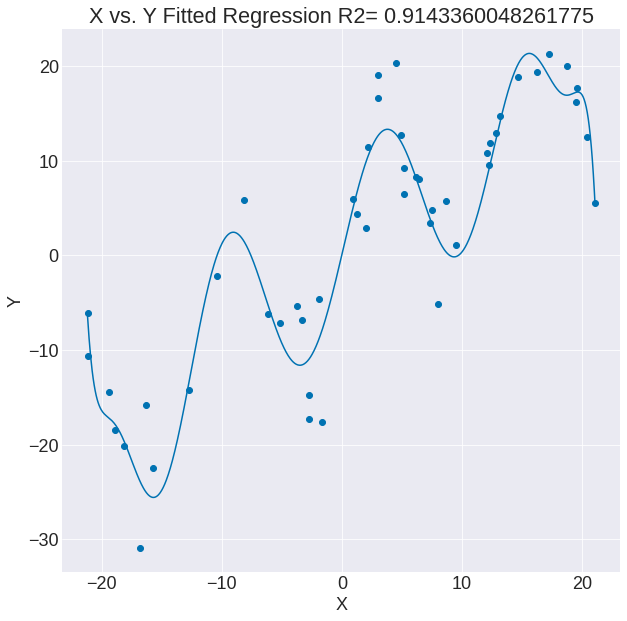

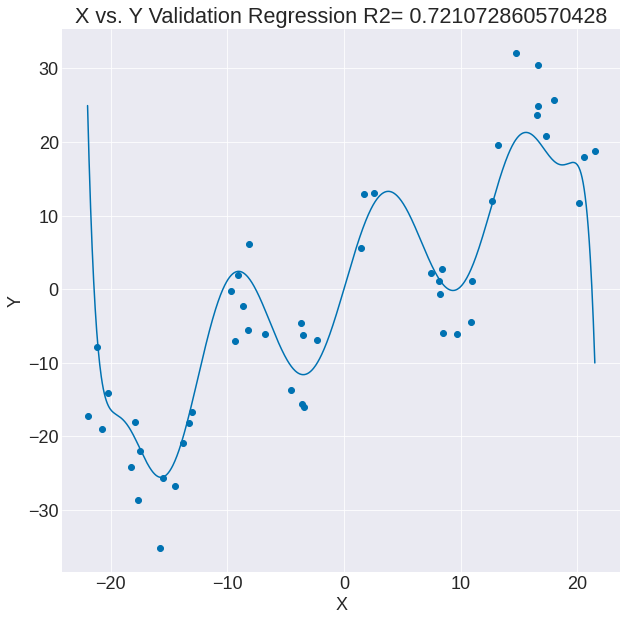

In [73]:
fit_reg2 = linear_regression.LinearRegression(fit_set)
fit_reg2.poly_regression("X","Y",12)
fit_reg2.scatter("X","Y", "X vs. Y Fitted Regression")
val_reg2 = linear_regression.LinearRegression(val_set)
val_reg2.initialize(ind_vars = "X",dep_var = "Y",slope = fit_reg2.get_fitted_slope(),intercept = fit_reg2.get_fitted_intercept(),p = 12)
val_reg2.scatter(ind_var = "X", dep_var = "Y", title = "X vs. Y Validation Regression")
print("The mean squared error: " , fit_reg2.compute_mse())
print("The mean squared error: " , val_reg2.compute_mse())

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

28567.217841850386


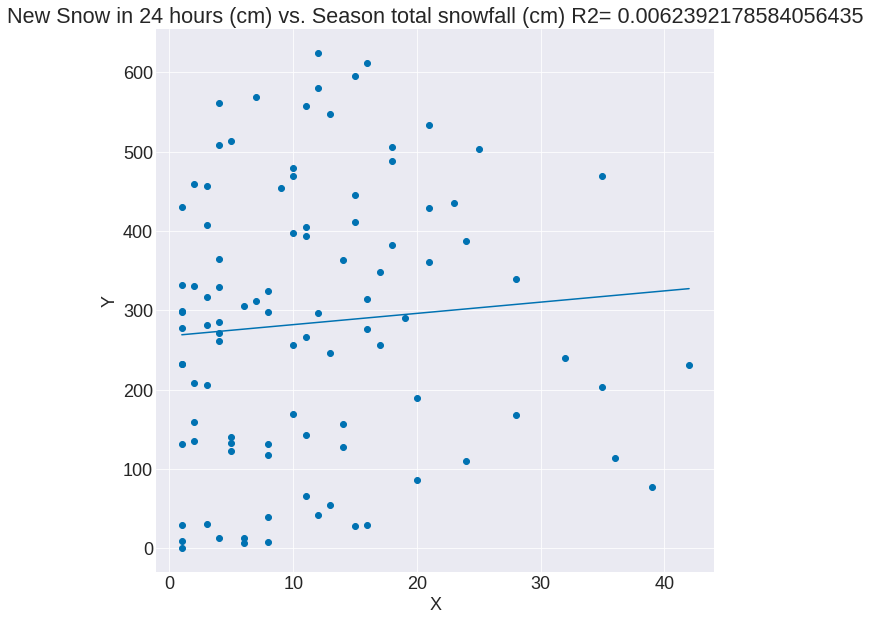

In [9]:
whistler_data = data.Data("data/whistler.csv")
whistler_reg = linear_regression.LinearRegression(whistler_data)
whistler_reg.poly_regression("X","Y",1)
whistler_reg.scatter("X","Y","New Snow in 24 hours (cm) vs. Season total snowfall (cm)")
print(whistler_reg.compute_mse())

In this first test I looked at snowfall in every 24 hours vs. the season total snowfall in Whistler. I thought that the linear regression line would have a greater slope and trend upwards more. The data actually appears to be very spread and not have a great correlation at all with a really close to 0 R2 and a huge MSE.

490.18115777290836


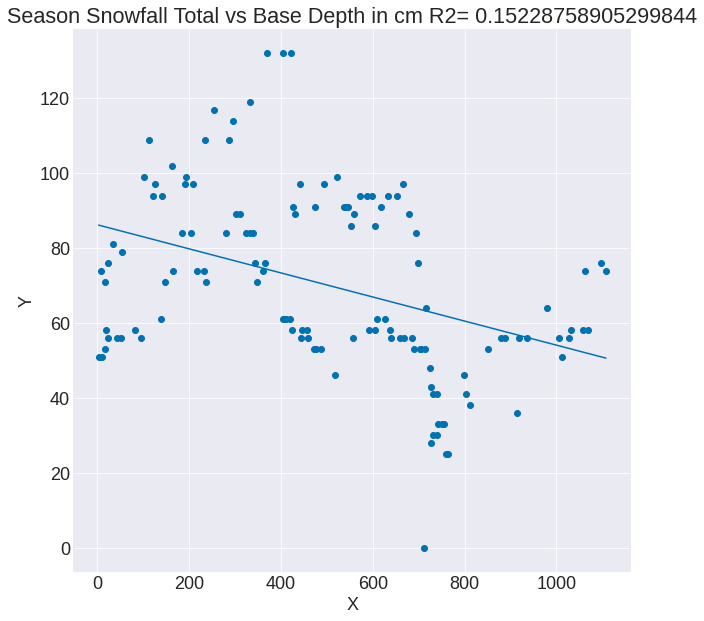

In [8]:
jackson_data = data.Data("data/jackson.csv")
jackson_reg = linear_regression.LinearRegression(jackson_data)
jackson_reg.poly_regression("X","Y",1)
jackson_reg.scatter("X","Y","Season Snowfall Total vs Base Depth in cm")
print(jackson_reg.compute_mse())

This data comparison is between season total snowfall and base depth in Jackso WY over two winters. I hypothesized that this would also trend upwards then down then back up which it does not very clearly. This data also does not show a super strong correlation. 

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`). [This website](https://real-statistics.com/regression/confidence-and-prediction-intervals/) should be a helpful reference.

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

346.21422166916506


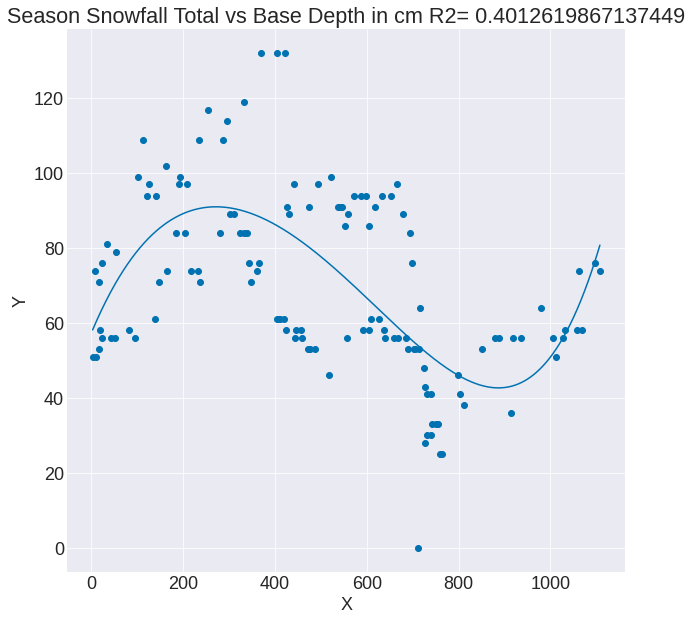

In [7]:
jackson_reg = linear_regression.LinearRegression(jackson_data)
jackson_reg.poly_regression("X","Y",5)
jackson_reg.scatter("X","Y", "Season Snowfall Total vs Base Depth in cm")
print(jackson_reg.compute_mse())

This data measures season total snowfall and basedepth in Jackson over two ski seasons. This data trends how I hypothesized it would. It trends up then down then back up. The regression line is not a good fit with the low R2 but this line best fits the points. I think with more data ove rmore years the polynomial regression may be better supported.  

1666.013099302031


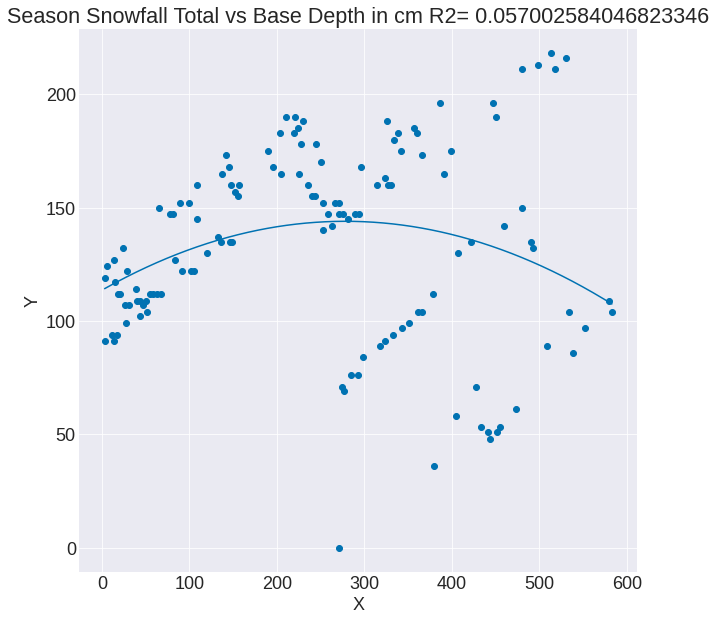

In [6]:
telluride_data = data.Data("data/telluride.csv")
telluride_reg = linear_regression.LinearRegression(telluride_data)
telluride_reg.poly_regression("X","Y",2)
telluride_reg.scatter("X","Y", "Season Snowfall Total vs Base Depth in cm")
print(telluride_reg.compute_mse())

I also looked at the season snowfall total and base depth in telluride for a couple seasons. This data I thought would appear more like the previous one but it does not. A polynomial regression is most likely the wrong way to analyze this data. 

835.2001203377031


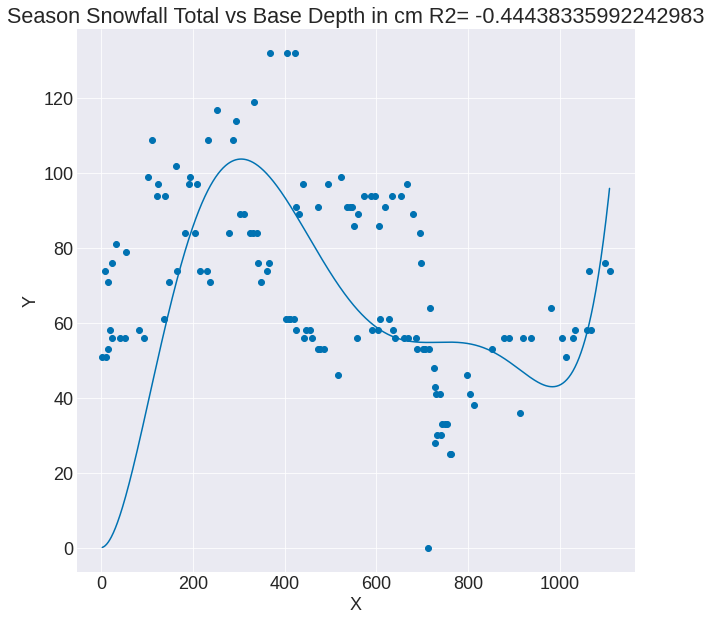

In [5]:
jackson_reg = linear_regression.LinearRegression(jackson_data)
jackson_reg.poly_regression("X","Y",6)
jackson_reg.scatter("X","Y", "Season Snowfall Total vs Base Depth in cm")
print(jackson_reg.compute_mse())

This is the same data as the previous Jackson data except it clearly is an overfit at 6 degrees with a negative R2 value and a very high MSE value.

70912.44019320373


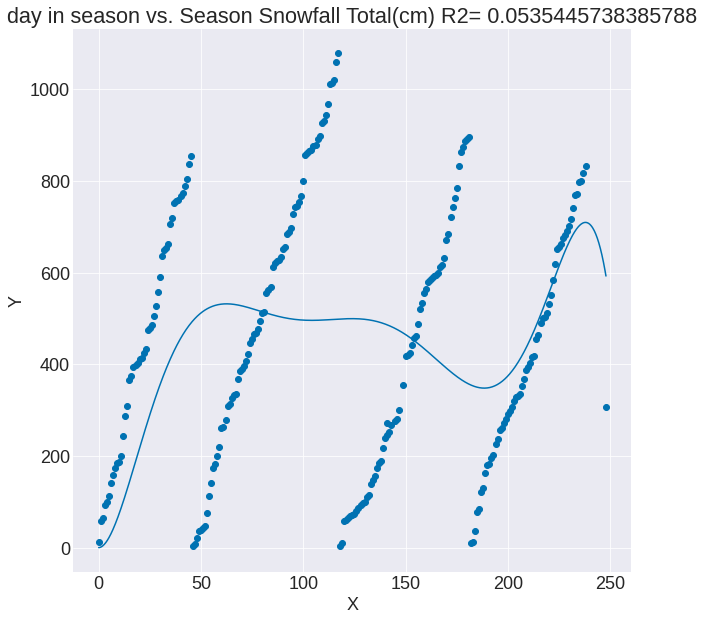

In [10]:
snowbird2_data = data.Data("data/Snowbird2.csv")
snowbird2_reg = linear_regression.LinearRegression(snowbird2_data)
snowbird2_reg.poly_regression("X","Y",7)
snowbird2_reg.scatter("X","Y", "day in season vs. Season Snowfall Total(cm)")
print(snowbird2_reg.compute_mse())

Lastly I looked at the progressive of season snowfall tital over four seasons in Snowbird Utah. This data appeared the way I thought it would but I was surpised to see that the plynomial regression line could not fit the data. This data is not a good set to be analysed this way or this is a massive overfit.

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.